# Algo 1:

Voice Activity Detection():
    1. set a frame size to 10ms and threshold
    2. for i to total sample :
           2.1. selct frame and calculate mean
           2.2. store value of step 2.1
    3. for i to total samples :
           3.1. if i greater than threshold value :
           3.2.     flag.i <- True
           3.3. else :
           3.4.     flag.i <- False
    4. get location of every voice activity
         (True values represent voice activity 
          False values represent silence)
    5. Ignore silence run less than 10 succesive
    6. Ignore speech run less than 5 succesive frames.
    7. create new .wav file for every detected voice range     

In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import csv
from scipy.stats.mstats import gmean
import math
from scipy.fftpack import rfft, rfftfreq
from scipy.io import wavfile

In [2]:
#y,sr=librosa.load('G:\\datasets\\mypca\\01-02-01-23-01.wav')
y,sr=librosa.load('G:\\datasets\\mypca\\01-02-01-23-01.wav')
# Loading audio data and extracting frequecy and samplerate

In [3]:
print(sr)# value of sample rate per second
print(len(y)) #total number of samples in audio file

22050
2010960


Text(0.5, 1.0, 'E:\\mypca\\01-02-01-23-01.wav')

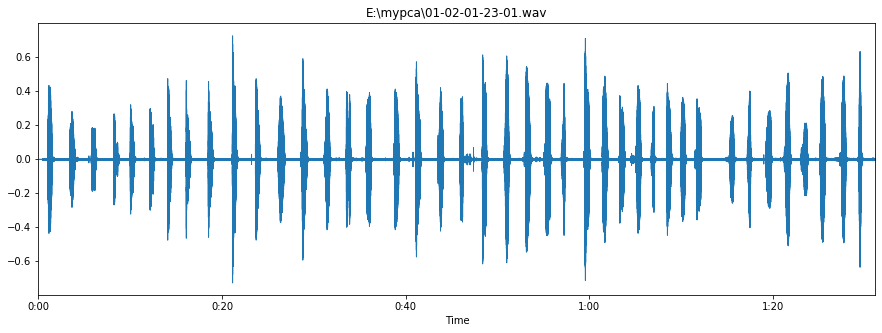

In [4]:
# Plotting wave plot of audio file
plt.figure(figsize=(15,5))
librosa.display.waveplot(y, sr=sr)
plt.title('E:\\mypca\\01-02-01-23-01.wav')

In [5]:
# Computing envelope values for each sample
# which return boolean array 
# where True mean speech and False means silence
def envelope(y,rate,threshold):
    mask=[]
    y = pd.Series(y).apply(np.abs)
    y_mean =y.rolling(window = 441, min_periods=1,center=True).mean()
    #y_mean= librosa.feature.rms(y=y)[0]
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [6]:
maska = envelope(y,sr,0.01)
maskb = envelope(y,sr,0.002)
mask1 = envelope(y,sr,0.003)
mask2 = envelope(y,sr,0.004)
mask3 = envelope(y,sr,0.0045)
mask4 = envelope(y,sr,0.005)
mask5 = envelope(y,sr,0.0055)
# calculating different mask based on different-2 threshold value

Text(0.5, 1.0, 'E:\\mypca\\01-02-01-23-01.wav,threshold=0.01')

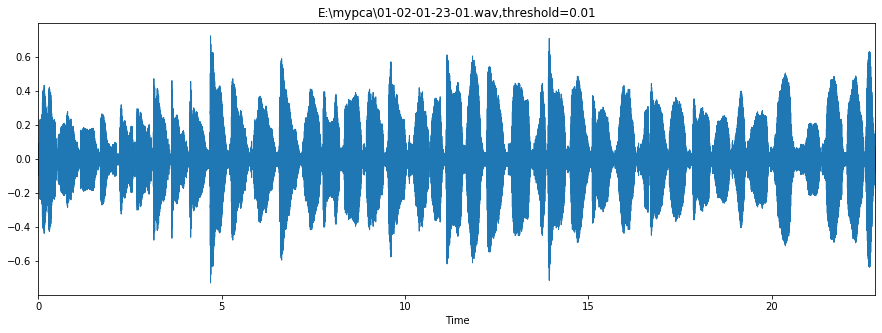

In [7]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(y[maska], sr=sr)
plt.title('E:\\mypca\\01-02-01-23-01.wav,threshold=0.01')

Text(0.5, 1.0, 'E:\\mypca\\01-02-01-23-01.wav,threshold=0.002')

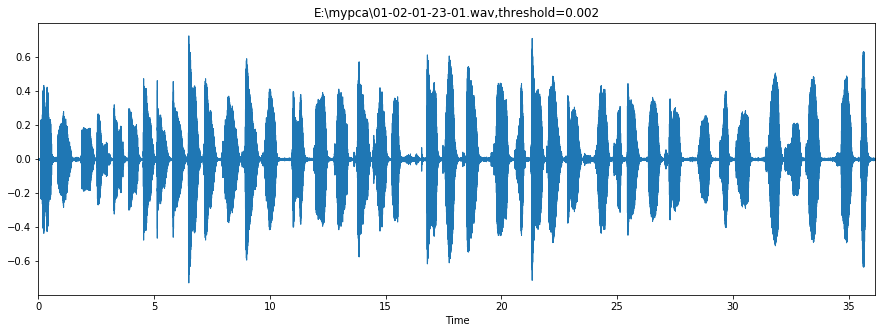

In [8]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(y[maskb], sr=sr)
plt.title('E:\\mypca\\01-02-01-23-01.wav,threshold=0.002')

Text(0.5, 1.0, 'E:\\mypca\\01-02-01-23-01.wav,threshold=0.003')

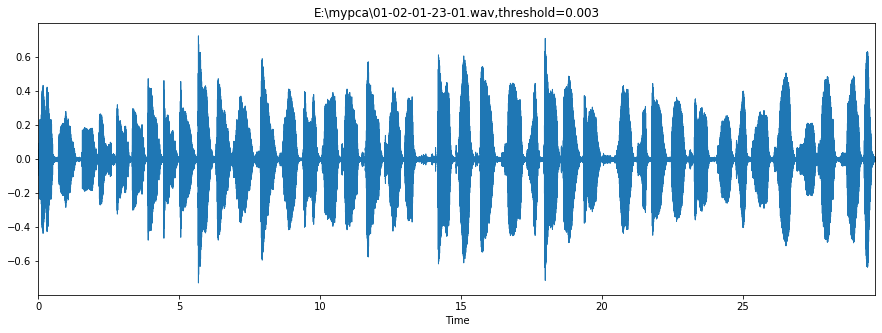

In [9]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(y[mask1], sr=sr)
plt.title('E:\\mypca\\01-02-01-23-01.wav,threshold=0.003')

Text(0.5, 1.0, 'E:\\mypca\\01-02-01-23-01.wav,threshold=0.004')

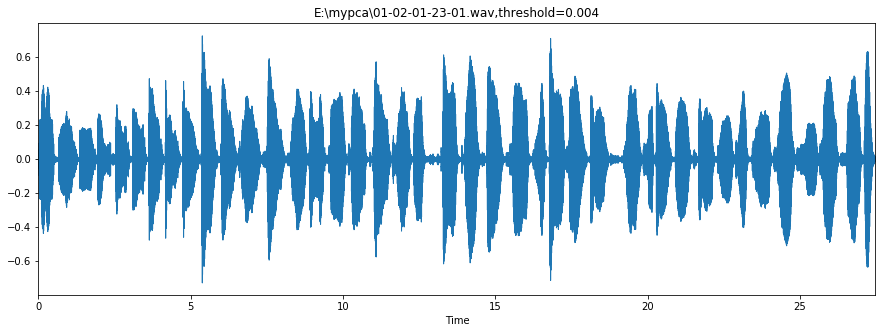

In [10]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(y[mask2], sr=sr)
plt.title('E:\\mypca\\01-02-01-23-01.wav,threshold=0.004')

Text(0.5, 1.0, 'E:\\mypca\\01-02-01-23-01.wav,threshold=0.0045')

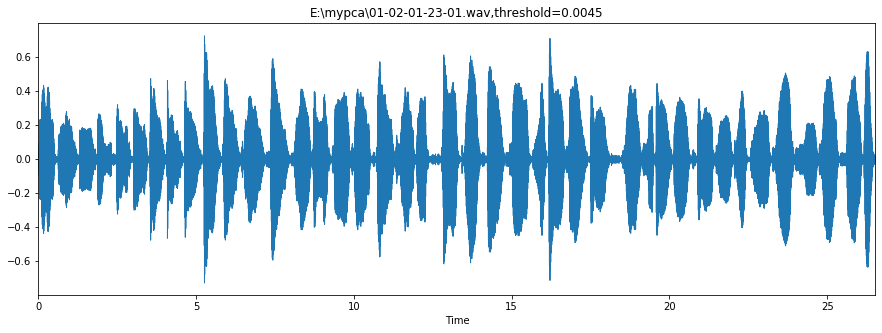

In [11]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(y[mask3], sr=sr)
plt.title('E:\\mypca\\01-02-01-23-01.wav,threshold=0.0045')

Text(0.5, 1.0, 'E:\\mypca\\01-02-01-23-01.wav,threshold=0.005')

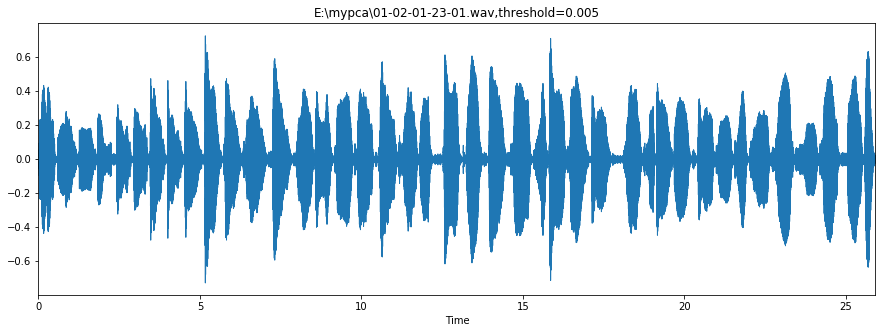

In [12]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(y[mask4], sr=sr)
plt.title('E:\\mypca\\01-02-01-23-01.wav,threshold=0.005')

Text(0.5, 1.0, 'E:\\mypca\\01-02-01-23-01.wav,threshold=0.0055')

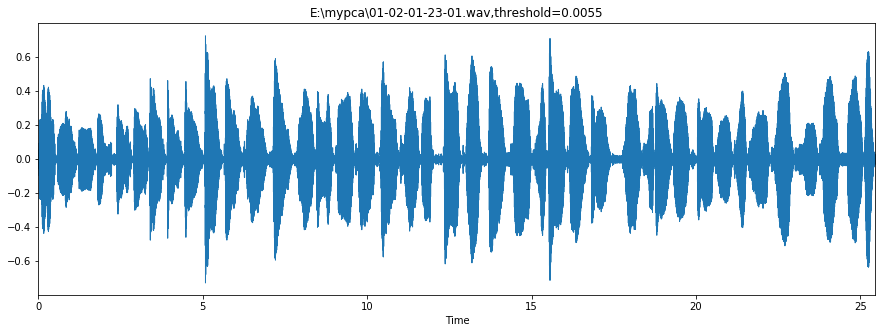

In [13]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(y[mask5], sr=sr)
plt.title('E:\\mypca\\01-02-01-23-01.wav,threshold=0.0055')

In [14]:
"""# split the audio data and create new wave file
def to_split_wav(start,end,psound):
    j=str(psound)
    i="01-02-01-23-01-"+j+".wav"
    wavfile.write(filename='G:\datasets\phoneme/'+i,rate=sr,data=y[start:end])"""

'# split the audio data and create new wave file\ndef to_split_wav(start,end,psound):\n    j=str(psound)\n    i="01-02-01-23-01-"+j+".wav"\n    wavfile.write(filename=\'G:\\datasets\\phoneme/\'+i,rate=sr,data=y[start:end])'

In [15]:
# p_location function return array of start and end location of audio
def p_location(signal):
    start=0
    end=0
    location=[]
    tflag=False
    mask = signal
    for i in range(len(mask)):
        if mask[i] == True :
            if tflag == False :
                tflag = True
                start = i
        else :
            if tflag == True:
                end = i-1
                location.append([start,end,end-start])
                tflag=False
    return np.asarray(location)
    #return (location)

In [16]:
mask = envelope(y,sr,0.003)
loc=p_location(mask)
print(len(loc))

205


In [17]:
# this section storing voiced signal sigmnet into file, segment size varies
count=0
for f in range(len(loc)):
    j=str(count)
    start = loc[f][0]
    end = loc[f][1]
    diff = loc[f][2]
    if diff > 882 :
        i="01-02-01-23-01-"+j+".wav"
        wavfile.write(filename='G:\datasets\phoneme/vad1/'+i,rate=sr,data=y[start:end])
        count+=1

In [18]:
print(count)

56


# TEST :

In [19]:
    threshold =0.004
    y = pd.Series(y).apply(np.abs)
    y_mean =y.rolling(window = 441, min_periods=1,center=True).mean()
    #y_mean= librosa.feature.rms(y=y)[0]
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    #return mask

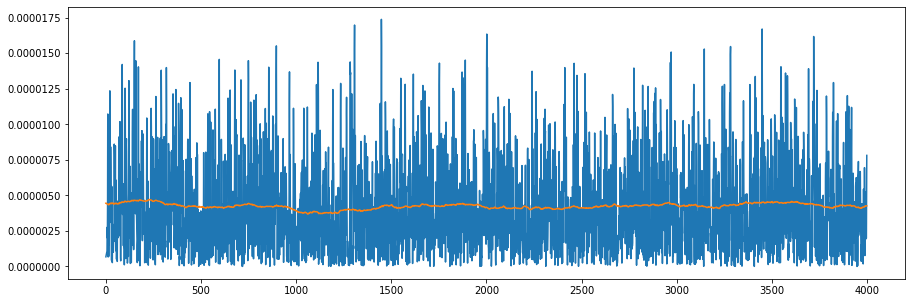

In [20]:
plt.figure(figsize=(15,5))
plt.plot(y[0:4000])
plt.plot(y_mean[0:4000])
plt.show()

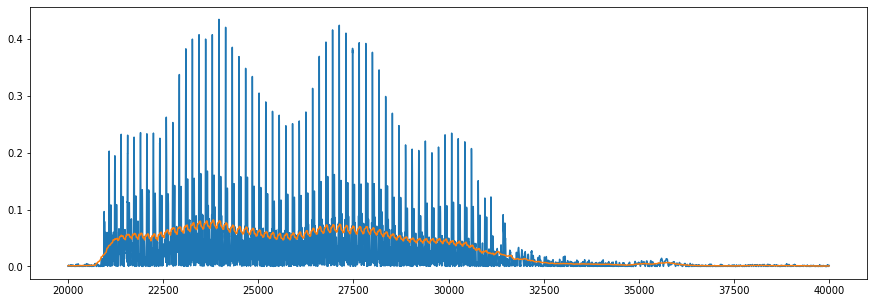

In [21]:
plt.figure(figsize=(15,5))
plt.plot(y[20000:40000])
plt.plot(y_mean[20000:40000])
plt.show()

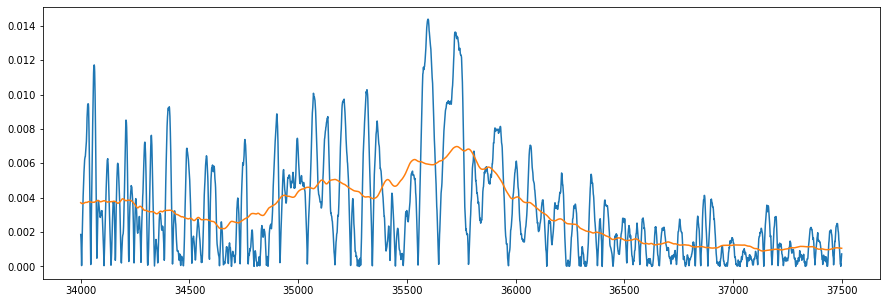

In [22]:
plt.figure(figsize=(15,5))
plt.plot(y[34000:37500])
plt.plot(y_mean[34000:37500])
plt.show()